In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(torch.has_cuda)
if torch.has_cuda:
    dev = torch.device('cuda')     # Default CUDA device
else:
    dev = torch.device('cpu')
print(dev)

True
cuda


In [3]:
def make_data(N=1000):
    x = np.random.rand(N,2)*2*np.pi
    y = np.sin(x[:,0])*np.cos(x[:,1])
    X = torch.tensor(x.reshape(N,2), dtype=torch.float32)
    Y = torch.tensor(y.reshape(N,1), dtype=torch.float32)
    return X,Y

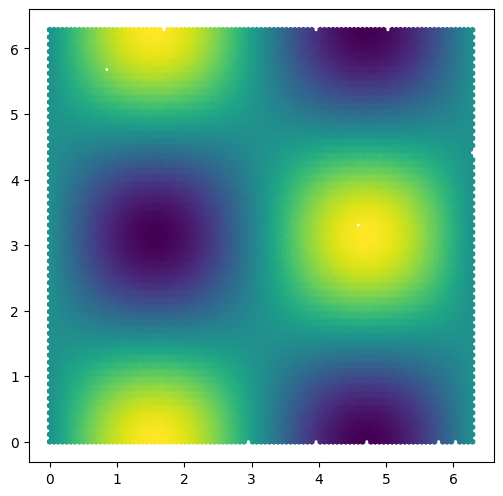

In [4]:
X,Y = make_data(100000)
fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
ax.hexbin(X[:,0],X[:,1], C=Y)
plt.show()

In [5]:
class FFNN(torch.nn.Module):
    r"""Abe's really simple Feed-Forward Neural Network. """
    def __init__(self, input_size, hidden_size, output_size):
        super(FFNN, self).__init__()
        self.input_to_hidden =  torch.nn.Linear(input_size, hidden_size)
        self.hidden_to_output = torch.nn.Linear(hidden_size, output_size)
        self.sig = torch.nn.Sigmoid()
        self.tanh = torch.nn.Tanh()

    def forward(self, input):
        hidden = self.sig(self.input_to_hidden(input))
        output = self.tanh(self.hidden_to_output(hidden))
        return output

In [6]:
nn = FFNN(2,10,1)
nn.to(dev)  # move the nn to the appropriate device

FFNN(
  (input_to_hidden): Linear(in_features=2, out_features=10, bias=True)
  (hidden_to_output): Linear(in_features=10, out_features=1, bias=True)
  (sig): Sigmoid()
  (tanh): Tanh()
)

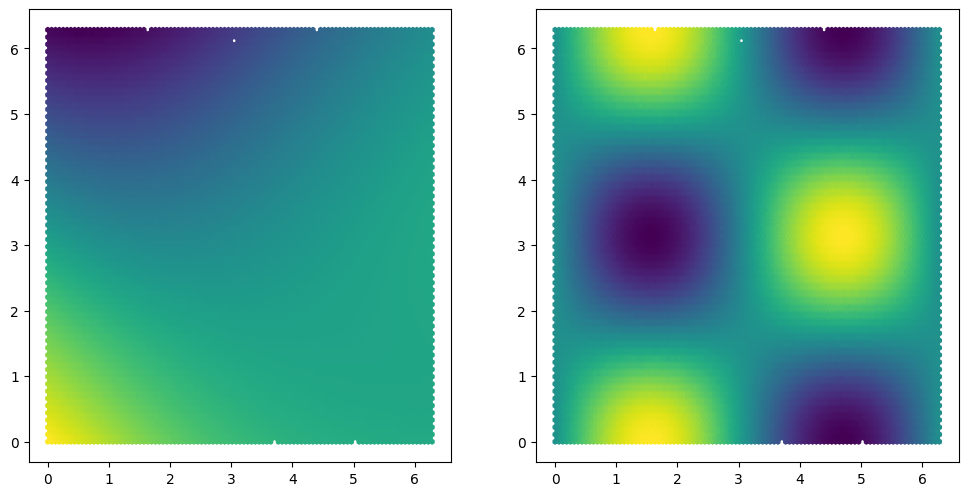

In [7]:
with torch.no_grad():
    nn.eval()
    X,Y = make_data(100000)
    fig,ax = plt.subplots(1,2, figsize=(12,6), dpi=100)
    ax[0].hexbin(X[:,0],X[:,1], C=nn(X.to(dev)).to('cpu'))
    ax[1].hexbin(X[:,0],X[:,1], C=Y) 
    plt.show()

In [8]:
optimizer = torch.optim.SGD(nn.parameters(), lr=1.0)
loss_fn = torch.nn.MSELoss() 

In [9]:
for epoch in range(20):
  # This block is one Epoch
  nn.to(dev)
  nn.train()
  for _ in range(1000):
      # this run is one Batch
     X, Y = make_data()
     X = X.to(dev)
     Y = Y.to(dev)
     Yhat = nn(X)
     loss = loss_fn(Yhat, Y)
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
  print(f"training loss {loss} after epoch {epoch}")

training loss 0.23033052682876587 after epoch 0
training loss 0.22843877971172333 after epoch 1
training loss 0.2062784731388092 after epoch 2
training loss 0.21510307490825653 after epoch 3
training loss 0.20521442592144012 after epoch 4
training loss 0.23273472487926483 after epoch 5
training loss 0.20368769764900208 after epoch 6
training loss 0.20153895020484924 after epoch 7
training loss 0.20001690089702606 after epoch 8
training loss 0.1629694551229477 after epoch 9
training loss 0.12723839282989502 after epoch 10
training loss 0.11075163632631302 after epoch 11
training loss 0.1465003490447998 after epoch 12
training loss 0.12928491830825806 after epoch 13
training loss 0.12305878102779388 after epoch 14
training loss 0.09936978667974472 after epoch 15
training loss 0.11882591992616653 after epoch 16
training loss 0.12391220778226852 after epoch 17
training loss 0.1070115715265274 after epoch 18
training loss 0.10728602856397629 after epoch 19


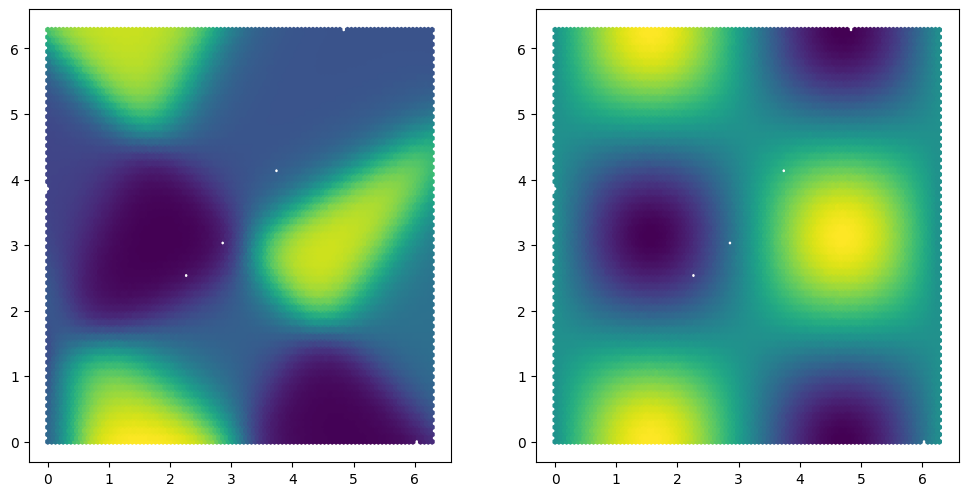

In [10]:
with torch.no_grad():
    nn.eval()
    X,Y = make_data(100000)
    fig,ax = plt.subplots(1,2, figsize=(12,6), dpi=100)
    ax[0].hexbin(X[:,0],X[:,1], C=nn(X.to(dev)).to('cpu'))
    ax[1].hexbin(X[:,0],X[:,1], C=Y) 
    plt.show()